<a href="https://colab.research.google.com/github/gkrry2723/MLclassroom_hw/blob/main/MLassignment02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

머신러닝 수업 과제 02  // 20184754 김현주
Linear Regression, Cost function
1. data
2. linear model
3. objective function
4. gradient descendent

** 1. input data**
- 임의의 리니어 함수 하나 정하기-> 파란색
- x의 범위 정해야함(-100~100)
- 포인트 검정색으로 찍기

y = 1*x+1 로 임의의 그래프를 정해보았다.


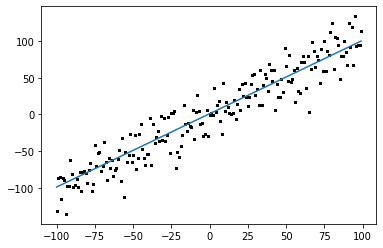

In [ ]:
import matplotlib.pyplot as plt
import random

#y=1*x+1로 직선 그래프 그리기
#x의 범위는 -100부터 100

x= range(-100,100)
y= [v+1 for v in x]
plt.plot(x,y)

#해당 직선 그래프를 기준으로 임의의 데이터 점 찍기

for i in range(0,100):
  xp= random.uniform(-100,100)
  yp=xp+1+ random.gauss(0,10)
  plt.scatter(x,y2, c="black", s=1)


**2. Output results**
- the set of points that have random perturbations with respect to the straight line (in black color)
- a straight line that is the graph of a solution obtained by linear regression (in red color)

- 얻게된 h함수 그리기(빨간색)

10201


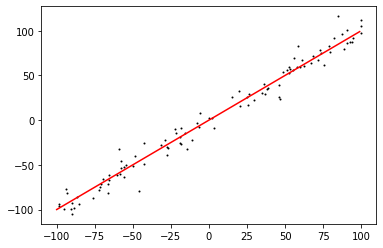

In [ ]:
import matplotlib.pyplot as plt
import random

#1번 과정에서의 랜덤 포인트를 생성하기
#data라는 중첩 list에 x좌표 y좌표 순으로 저장해서 출력

data=[]
for i in range(0,100):
  xp= random.uniform(-100,100)
  yp= xp+1+ random.gauss(0,10)
  l=[xp,yp]
  data.append(l)
  plt.scatter(data[i][0],data[i][1], c="black", s=1)
  

# linear regression 과정을 통해 h함수 구하기(in red)
# cost function 이용 
# J(a,b)=1/2mΣ(ax+b-y)^2 , i는 1부터 m(100)까지
# J를 가장 작게 하는 a,b 구하기

L=[]        #세타1,세타0,J함수 값을 차례대로 넣는 중첩 list
m=100
k=0

#a=세타1, b=세타0
for a in range(-50,51):
  for b in range(-50,51):
    T=[]
    J=0
    for i in range(0,m):
      S=a*data[i][0]+b-data[i][1]
      J=(S**2)+J
    J=J/2*m
    T=[a,b,J]
    L.append(T)

#J를 가장 작게 만드는 a,b찾기

smallest=0

for i in range(0,10201):
  if L[i][2]<L[smallest][2]:
    smallest=i

#찾은 가장 작은 J를 갖는 a,b로 함수 그리기
x=range(-100,100)
y=[L[smallest][0]*v+L[smallest][1] for v in x ]
plt.plot(x,y,c="red")

#결론: linear regression 을 이용한 cost function을 통해 원래의 함수를 찾을 수 있다.



**4. Plotting the model parameters**
- the value of the model parameters θ0 and θ1 at every optimization step (in red (θ0) and blue (θ1​) colors)
- the optimization should be performed until convergence


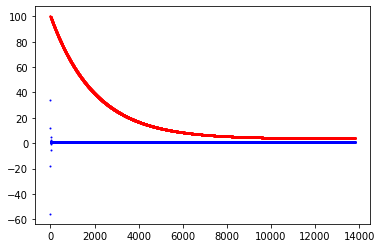

In [ ]:
#θ^j를 j라고 표현
#세타0=a, 세타1=b, α=p 
#j=j-α*(δ/δj)*J(세타0,세타1)(for j=0 and j=1)
#j=0에서 (δ/δj)*J(a,b)=1/m*Σ(a*x[i]+b-y[i])=d0
#j=1에서 (δ/δj)*J(a,b)=1/m^Σ(a*x[i]+b-y[i])*x[i]=d1

import matplotlib.pyplot as plt
import random

#1번 과정에서의 랜덤 포인트를 생성하기

data=[]
for i in range(0,100):
  xp= random.uniform(-100,100)
  yp=xp+1+ random.gauss(0,10)
  l=[xp,yp]
  data.append(l)

#gradient descent를 통해 value 그리기
#p=α, d0=(δ/δj0)*J(세타0,세타1), d1=(δ/δj1)*J(세타0,세타1), s= Σ(a*x[i]+b-y[i])

#initialization
#a,b가 크면 시간이 너무 오래 소요되서 100으로 함
#알파값은 0.0005로 하였고 그이상이면 발산하고 그 이하면 너무 느림

a=100             #세타1
b=100             #세타0
m=100             #i
p=0.0005          #알파
d0=100            #(δ/δj0)*J(세타0,세타1) 인데 처음 while에서 안 걸리기위해 초기값을 그냥 임의로 100으로 설정
d1=100            #(δ/δj1)*J(세타0,세타1) 100인 이유는 위와 동일
step=1            #step 수

while ((-0.1>d0) or (d0>0.1)) or ((-0.1>d1) or (d1>0.1)):
  s0=0
  s1=0
  
  for i in range(0,m):
    s=a*data[i][0]+b-data[i][1] 

    s0=s*data[i][0]+s0
    s1=s+s1

  d0= s0/m
  d1= s1/m

  a= a-p*d0
  b= b-p*d1

  plt.scatter(step,a,c="blue",s=1)
  plt.scatter(step,b,c="red",s=1)
  step=step+1

**3. Plotting the energy values**
- the value of the objective function at every optimization step by the gradient descent algorithm (in blue color)
- the optimization should be performed until convergence

=>

- gradient descent algorithm을 통해 나오는 opotimization step을 파란색으로 표현하기->수렴시까지



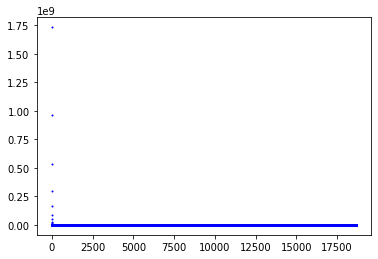

In [ ]:
#θ^j를 j라고 표현
#세타0=a, 세타1=b, α=p 
#j=j-α*(δ/δj)*J(세타0,세타1)(for j=0 and j=1)
#j=0에서 (δ/δj)*J(a,b)=1/m*Σ(a*x[i]+b-y[i])=d0
#j=1에서 (δ/δj)*J(a,b)=1/m^Σ(a*x[i]+b-y[i])*x[i]=d1

import matplotlib.pyplot as plt
import random

#1번 과정에서의 랜덤 포인트를 생성하기

data=[]
for i in range(0,100):
  xp= random.uniform(-100,100)
  yp=xp+1+ random.gauss(0,10)
  l=[xp,yp]
  data.append(l)

#gradient descent를 통해 value 그리기
#p=α, d0=(δ/δj0)*J(세타0,세타1), d1=(δ/δj1)*J(세타0,세타1), s= Σ(a*x[i]+b-y[i])

#initialization 4번과 동일
a=1000
b=1000
m=100
p=0.0005
d0=100
d1=100
step=1

while ((-0.1>d0) or (d0>0.1)) or ((-0.1>d1) or (d1>0.1)):
  s0=0
  s1=0
  ss=0

  for i in range(0,m):
    s=a*data[i][0]+b-data[i][1] 
    s_pow=s**2

    s0=s*data[i][0]+s0
    s1=s+s1
    ss=ss+s_pow

  d0= s0/m
  d1= s1/m

  a= a-p*d0
  b= b-p*d1
  J=ss/(2*m)

  plt.scatter(k,J,c="blue",s=1)
  step=step+1